In [98]:
import pandas as pd
import numpy as np
import cv2
import glob
import matplotlib.pylab as plt
import seaborn as sns
import os,sys

In [99]:
high18_images = sorted(glob.glob("data/*high18/done/*.png"))
high27_images = sorted(glob.glob("data/*high27/done/*.png"))
low18_images = sorted(glob.glob("data/*low18/done/*.png"))
low27_images = sorted(glob.glob("data/*low27/done/*.png"))

print("\n",
    "Number of images in treatment: High, 18:", len(high18_images), "\n",
    "Number of images in treatment: High, 27:", len(high27_images), "\n",
    "Number of images in treatment: Low, 18:", len(low18_images), "\n",
    "Number of images in treatment: Low, 27:", len(low27_images), "\n",
)


 Number of images in treatment: High, 18: 37 
 Number of images in treatment: High, 27: 27 
 Number of images in treatment: Low, 18: 30 
 Number of images in treatment: Low, 27: 29 



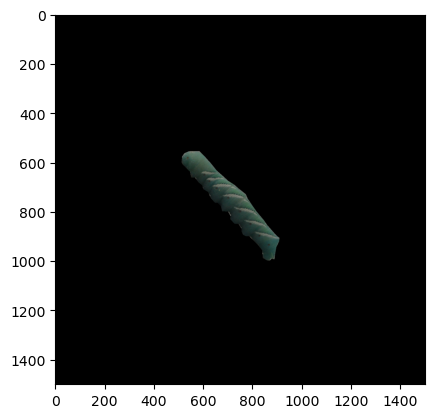

In [100]:
## Display test image
img = cv2.imread(high18_images[0], cv2.IMREAD_UNCHANGED)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = np.array(img[:,:,3]>0).astype(bool) # indexing
#resized = cv2.resize(rgb_img,None,fx=0.2,fy=0.2)
plt.imshow(rgb_img)
plt.show()


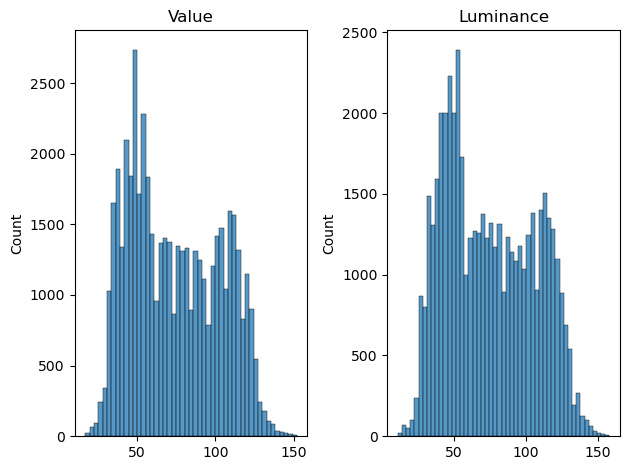

In [101]:
value = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

fig,ax = plt.subplots(1,2)
ax[0] = sns.histplot(value[mask][:,2], ax=ax[0])
ax[1] = sns.histplot(lab[mask][:,0], ax=ax[1])

ax[0].set_title("Value")
ax[1].set_title("Luminance")
plt.tight_layout()
plt.show()


In [5]:
print("Minimum Alpha:", np.min(img[:,:,3]))
print("Maximum Alpha:", np.max(img[:,:,3]))

Minimum Alpha: 0
Maximum Alpha: 255


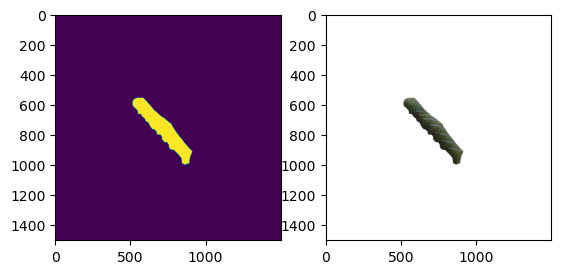

In [102]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(mask)
ax[1].imshow(img)
plt.show()

In [7]:
## For 1D image:
red_channel_values = img[mask][:,0]
green_channel_values = img[mask][:,1]
blue_channel_values = img[mask][:,2]

## For 2D image:
# red_channel_values = np.array([red_channel[x,y] for x in np.arange(red_channel.shape[0]) for y in np.arange(red_channel.shape[1])])
# green_channel_values = np.array([green_channel[x,y] for x in np.arange(green_channel.shape[0]) for y in np.arange(green_channel.shape[1])])
# blue_channel_values = np.array([blue_channel[x,y] for x in np.arange(blue_channel.shape[0]) for y in np.arange(blue_channel.shape[1])])

## Multiple Image Analysis

To Do:
- Export to file (pandas library)
- Combine across treatments
- Correct for differences in pixel number/size (cm per pixel)
- Get per image values 
- Include luminance and "value / lightness"

In [1]:
fig, ax = plt.subplots()
ax = sns.histplot(red_channel_values[red_channel_values > 0], color='r', ax=ax)
ax = sns.histplot(green_channel_values[green_channel_values > 0], color='g', ax=ax)
ax = sns.histplot(blue_channel_values[blue_channel_values > 0], color='b', ax=ax)
plt.show()

NameError: name 'plt' is not defined

To Do: 
- correct for object size
- ~~repeat file name as often as values (check for same shape across image types)~~
- single metrics per image
- export to dataframe

In [11]:
# TREATMENT: HIGH 18 
# create empty value arrays
high18_r_values = []
high18_g_values = []
high18_b_values = []
high18_v_values = []
high18_lum_values = []
high18_file_names = []

# loop over all images 
for image in high18_images: 
    img = cv2.imread(image, cv2.IMREAD_UNCHANGED)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    mask = np.array(img[:,:,3]>0).astype(bool) # indexing

    # separate color channels (x,y,color channel)       
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]
    
    # value and luminance
    value_values = hsv_image[mask][:,2]
    luminance_values = lab_image[:,0]
    high18_v_values = np.append(high18_v_values, value_values)
    high18_lum_values = np.append(high18_lum_values, luminance_values)

    # color values per pixel
    ## For 1D image:
    red_channel_values = img[mask][:,0]
    green_channel_values = img[mask][:,1]
    blue_channel_values = img[mask][:,2]

    ## For 2D image:
    # red_channel_values = np.array([red_channel[x,y] for x in np.arange(red_channel.shape[0]) for y in np.arange(red_channel.shape[1])])
    # green_channel_values = np.array([green_channel[x,y] for x in np.arange(green_channel.shape[0]) for y in np.arange(green_channel.shape[1])])
    # blue_channel_values = np.array([blue_channel[x,y] for x in np.arange(blue_channel.shape[0]) for y in np.arange(blue_channel.shape[1])])
    
    # adding values to global array for all images to be collected
    high18_r_values = np.append(high18_r_values, red_channel_values)
    high18_g_values = np.append(high18_g_values, green_channel_values)
    high18_b_values = np.append(high18_b_values, blue_channel_values)
        
    # add file name to array
    high18_file_names = np.append(high18_file_names, np.repeat(image,len(high18_r_values)))
        
    # print example values
    print(image, high18_r_values.shape)
    
# TREATMENT: HIGH 27 
# create empty value arrays
high27_r_values = []
high27_g_values = []
high27_b_values = []
high27_file_names = []

# loop over all images 
for image in high27_images: 
    img = cv2.imread(image, cv2.IMREAD_UNCHANGED)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    mask = np.array(img[:,:,3]>0).astype(bool) # indexing

    # separate color channels (x,y,color channel)       
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]

    # value and luminance
    value_values = hsv_image[mask][:,2]
    luminance_values = lab_image[:,0]
    high18_v_values = np.append(high18_v_values, value_values)
    high18_lum_values = np.append(high18_lum_values, luminance_values)

    # color values per pixel
    ## For 1D image:
    red_channel_values = img[mask][:,0]
    green_channel_values = img[mask][:,1]
    blue_channel_values = img[mask][:,2]
    
    # red_channel_values = np.array([red_channel[x,y] for x in np.arange(red_channel.shape[0]) for y in np.arange(red_channel.shape[1])])
    # green_channel_values = np.array([green_channel[x,y] for x in np.arange(green_channel.shape[0]) for y in np.arange(green_channel.shape[1])])
    # blue_channel_values = np.array([blue_channel[x,y] for x in np.arange(blue_channel.shape[0]) for y in np.arange(blue_channel.shape[1])])
    
    # adding values to global array for all images to be collected
    high27_r_values = np.append(high27_r_values, red_channel_values)
    high27_g_values = np.append(high27_g_values, green_channel_values)
    high27_b_values = np.append(high27_b_values, blue_channel_values)
    
    # add file name to array
    high27_file_names = np.append(high27_file_names, np.repeat(image,len(high27_r_values)))
    
    # print example values
    print(image, high27_r_values.shape)
    
# TREATMENT: LOW 18 
# create empty value arrays
low18_r_values = []
low18_g_values = []
low18_b_values = []
low18_file_names = []

# loop over all images 
for image in low18_images: 
    img = cv2.imread(image, cv2.IMREAD_UNCHANGED)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    mask = np.array(img[:,:,3]>0).astype(bool) # indexing
    
    # separate color channels (x,y,color channel)       
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]
    
    # value and luminance
    value_values = hsv_image[mask][:,2]
    luminance_values = lab_image[:,0]
    high18_v_values = np.append(high18_v_values, value_values)
    high18_lum_values = np.append(high18_lum_values, luminance_values)

    # color values per pixel
    ## For 1D image:
    red_channel_values = img[mask][:,0]
    green_channel_values = img[mask][:,1]
    blue_channel_values = img[mask][:,2]
    
    # red_channel_values = np.array([red_channel[x,y] for x in np.arange(red_channel.shape[0]) for y in np.arange(red_channel.shape[1])])
    # green_channel_values = np.array([green_channel[x,y] for x in np.arange(green_channel.shape[0]) for y in np.arange(green_channel.shape[1])])
    # blue_channel_values = np.array([blue_channel[x,y] for x in np.arange(blue_channel.shape[0]) for y in np.arange(blue_channel.shape[1])])
    
    # adding values to global array for all images to be collected
    low18_r_values = np.append(low18_r_values, red_channel_values)
    low18_g_values = np.append(low18_g_values, green_channel_values)
    low18_b_values = np.append(low18_b_values, blue_channel_values)
    
    # add file name to array
    low18_file_names = np.append(low18_file_names, np.repeat(image,len(low18_r_values)))

    # print example values
    print(image, low18_r_values.shape)
    
# TREATMENT: LOW 27
# create empty value arrays
low27_r_values = []
low27_g_values = []
low27_b_values = []
low27_file_names = []

# loop over all images 
for image in low27_images: 
    img = cv2.imread(image, cv2.IMREAD_UNCHANGED)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    mask = np.array(img[:,:,3]>0).astype(bool) # indexing

    # separate color channels (x,y,color channel)       
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]
    
    # value and luminance
    value_values = hsv_image[mask][:,2]
    luminance_values = lab_image[:,0]
    high18_v_values = np.append(high18_v_values, value_values)
    high18_lum_values = np.append(high18_lum_values, luminance_values)

    # color values per pixel
    ## For 1D image:
    red_channel_values = img[mask][:,0]
    green_channel_values = img[mask][:,1]
    blue_channel_values = img[mask][:,2]

    # red_channel_values = np.array([red_channel[x,y] for x in np.arange(red_channel.shape[0]) for y in np.arange(red_channel.shape[1])])
    # green_channel_values = np.array([green_channel[x,y] for x in np.arange(green_channel.shape[0]) for y in np.arange(green_channel.shape[1])])
    # blue_channel_values = np.array([blue_channel[x,y] for x in np.arange(blue_channel.shape[0]) for y in np.arange(blue_channel.shape[1])])
    
    # adding values to global array for all images to be collected
    low27_r_values = np.append(low27_r_values, red_channel_values)
    low27_g_values = np.append(low27_g_values, green_channel_values)
    low27_b_values = np.append(low27_b_values, blue_channel_values)
    
    # add file name to array
    low27_file_names = np.append(low27_file_names, np.repeat(image,len(low27_r_values)))
    
    # print example values
    print(image, low27_r_values.shape)

data/23high18/done/425.png (336976,)
data/23high18/done/427.png (767642,)
data/23high18/done/428.png (1087274,)
data/23high18/done/429.png (1481316,)
data/23high18/done/430.png (1877289,)
data/23high18/done/431.png (2246163,)
data/23high18/done/432.png (2593940,)
data/23high18/done/433.png (2950373,)
data/23high18/done/434.png (3281356,)
data/23high18/done/435.png (3682781,)
data/23high18/done/436.png (3907464,)
data/23high18/done/437.png (4193877,)
data/23high18/done/439.png (4535590,)
data/23high18/done/441.png (4865000,)
data/23high18/done/442.png (5323474,)
data/23high18/done/443.png (5758727,)
data/23high18/done/444.png (6069380,)
data/23high18/done/445.png (6470025,)
data/23high18/done/446.png (6805246,)
data/23high18/done/447(labeled 442).png (7141744,)
data/23high18/done/448.png (7462607,)
data/23high27/done/355.png (395366,)
data/23high27/done/357.png (832369,)
data/23high27/done/358.png (1357682,)
data/23high27/done/359.png (1748952,)
data/23high27/done/360.png (2077902,)
dat

: 

: 

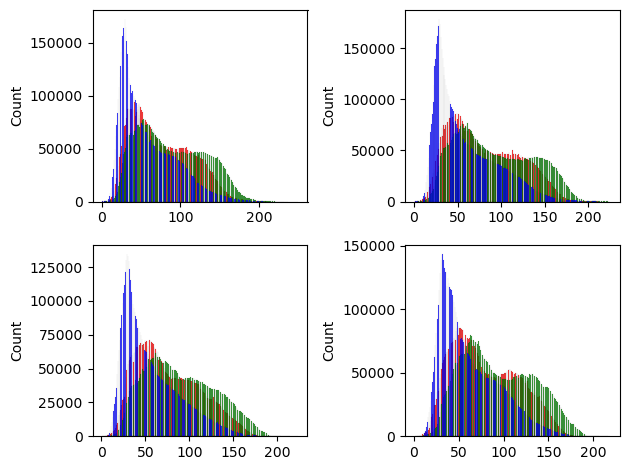

In [84]:
## plot values of all images
fig, ax = plt.subplots(2,2)

## TREATMENT: HIGH 18
ax[0,0] = sns.histplot(high18_r_values[high18_r_values > 0], color='r', ax=ax[0,0])
ax[0,0] = sns.histplot(high18_g_values[high18_g_values > 0], color='g', ax=ax[0,0])
ax[0,0] = sns.histplot(high18_b_values[high18_b_values > 0], color='b', ax=ax[0,0])

## TREATMENT: LOW 18
ax[0,1] = sns.histplot(low18_r_values[low18_r_values > 0], color='r', ax=ax[0,1])
ax[0,1] = sns.histplot(low18_g_values[low18_g_values > 0], color='g', ax=ax[0,1])
ax[0,1] = sns.histplot(low18_b_values[low18_b_values > 0], color='b', ax=ax[0,1])

## TREATMENT: HIGH 27
ax[1,0] = sns.histplot(high27_r_values[high27_r_values > 0], color='r', ax=ax[1,0])
ax[1,0] = sns.histplot(high27_g_values[high27_g_values > 0], color='g', ax=ax[1,0])
ax[1,0] = sns.histplot(high27_b_values[high27_b_values > 0], color='b', ax=ax[1,0])

## TREATMENT: LOW 27
ax[1,1] = sns.histplot(low27_r_values[low27_r_values > 0], color='r', ax=ax[1,1])
ax[1,1] = sns.histplot(low27_g_values[low27_g_values > 0], color='g', ax=ax[1,1])
ax[1,1] = sns.histplot(low27_b_values[low27_b_values > 0], color='b', ax=ax[1,1])

plt.tight_layout()
plt.show()

In [14]:

## Print some descriptive values
print(np.mean(blue_channel_values[blue_channel_values > 0]),
      np.max(blue_channel_values[blue_channel_values > 0]),
      np.min(blue_channel_values[blue_channel_values > 0]))

46.276318886702384 194 1


### Combining Spreadsheets

In [103]:
## location of the datasheet
photo_datasheet_loc = 'data/photosheet.csv'
performance_datasheet_loc = 'data/Merged_Performance_Minus_Tomato.csv'
thermal_datasheet_loc = 'data/Merged_Thermal_Minus_Tomato.csv'
video_datasheet_loc = 'data/Photo and Video ID.csv'
color_datasheet_loc = 'data/output_sheet_171023.csv'

photo_datasheet = pd.read_csv(photo_datasheet_loc)
performance_datasheet = pd.read_csv(performance_datasheet_loc)
thermal_datasheet = pd.read_csv(thermal_datasheet_loc)
video_datasheet = pd.read_csv(video_datasheet_loc)
color_datasheet = pd.read_csv(color_datasheet_loc)

new_datasheet = pd.DataFrame()

for identity in np.unique(performance_datasheet['ID']):
    per = performance_datasheet[performance_datasheet['ID']==identity]
    therm = thermal_datasheet[thermal_datasheet['ID']==identity]
    vid = video_datasheet[video_datasheet['ID']==identity]
    col = color_datasheet[color_datasheet['ID']==identity]
    phot = photo_datasheet[photo_datasheet['ID']==identity]
    
    df = pd.concat([per, therm.loc[:, therm.columns != 'ID'], vid.loc[:, vid.columns != 'ID'], col.loc[:, col.columns != 'ID'], phot.loc[:, phot.columns != 'ID']], axis = 1)

    print(col.loc[:,col.columns != 'ID'].shape)

    # df = pd.concat([per, therm.loc[:, therm.columns != 'ID'], 
    #     vid.loc[:, vid.columns != 'ID'],
    #     col.loc[:, col.columns != 'ID'],
    #     phot.loc[:, phot.columns != 'ID']],ignore_index=True)

    # print(df.shape)

    # new_datasheet = pd.concat([new_datasheet, df], ignore_index=True)

# df = pd.merge(photo_datasheet,performance_datasheet, how='outer', on=["ID"])
# df = pd.merge(df,thermal_datasheet, how='outer')
# df = pd.merge(df,video_datasheet, how='outer')
# df = pd.merge(df,color_datasheet, how='outer')

# new_datasheet.to_excel('data/combined_sheet.xlsx', index=False)

(0, 20)
(1, 20)
(1, 20)
(1, 20)
(1, 20)
(1, 20)
(0, 20)
(1, 20)
(1, 20)
(1, 20)
(1, 20)
(1, 20)
(1, 20)
(1, 20)
(1, 20)
(0, 20)
(0, 20)
(0, 20)
(1, 20)
(1, 20)
(0, 20)
(0, 20)
(1, 20)
(0, 20)
(0, 20)
(0, 20)
(1, 20)
(0, 20)
(0, 20)
(0, 20)
(0, 20)
(1, 20)
(0, 20)
(1, 20)
(0, 20)
(1, 20)
(0, 20)
(0, 20)
(0, 20)
(1, 20)
(1, 20)
(0, 20)
(1, 20)
(1, 20)
(1, 20)
(1, 20)
(0, 20)
(0, 20)
(1, 20)
(1, 20)
(0, 20)
(0, 20)
(0, 20)
(0, 20)
(1, 20)
(0, 20)
(1, 20)
(0, 20)
(1, 20)
(1, 20)
(1, 20)
(1, 20)
(1, 20)
(1, 20)
(1, 20)
(0, 20)
(1, 20)
(0, 20)
(1, 20)
(1, 20)
(0, 20)
(0, 20)
(0, 20)
(1, 20)
(0, 20)
(1, 20)
(1, 20)
(0, 20)
(0, 20)
(0, 20)
(1, 20)
(0, 20)
(1, 20)
(1, 20)
(0, 20)
(1, 20)
(1, 20)
(1, 20)
(0, 20)
(0, 20)
(0, 20)
(1, 20)
(0, 20)
(1, 20)
(0, 20)
(1, 20)
(1, 20)
(1, 20)
(1, 20)
(1, 20)
(1, 20)
(1, 20)
(0, 20)
(0, 20)
(1, 20)
(1, 20)
(1, 20)
(0, 20)
(0, 20)
(1, 20)
(1, 20)
(1, 20)
(1, 20)
(0, 20)
(1, 20)
(0, 20)
(1, 20)
(1, 20)
(0, 20)
(0, 20)
(0, 20)
(0, 20)
(0, 20)
(0, 20)
(1, 20)


### Loop over Treatments

In [104]:
# create empty value arrays
## general
file_names = []
treatments = []
identities = []
sizes = []
years = []
diets = []
temps = []
## mean
r_mean_values = []
g_mean_values = []
b_mean_values = []
v_mean_values = []
lum_mean_values = []
## median
r_median_values = []
g_median_values = []
b_median_values = []
v_median_values = []
lum_median_values = []
## variance
r_variance_values = []
g_variance_values = []
b_variance_values = []
v_variance_values = []
lum_variance_values = []

## location of the datasheet
datasheet_location = 'data/photosheet.csv'
datasheet = pd.read_csv(datasheet_location)

for treatment in ['high18', 'high27', 'low18', 'low27']:

    # select images based on treatment:
    if treatment == 'high18':
        images = high18_images
    elif treatment == 'high27':
        images = high27_images
    elif treatment == 'low18':
        images = low18_images
    else:
        images = low27_images

    # loop over all images 
    for image in images:
        identity = int(os.path.basename(image).split('.')[0]) # remove extension
        try:
            size = datasheet.loc[datasheet['ID'] == identity]['pixels per cm'].to_numpy().astype(float)[0]
            year = datasheet.loc[datasheet['ID'] == identity]['year'].to_numpy()[0]
            temp = datasheet.loc[datasheet['ID'] == identity]['Temp.'].to_numpy()[0]
            diet = datasheet.loc[datasheet['ID'] == identity]['Diet'].to_numpy()[0]
            
            img = cv2.imread(image, cv2.IMREAD_UNCHANGED)
            rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
            hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
            mask = np.array(img[:,:,3]>0).astype(bool) # indexing

            # separate color channels (x,y,color channel)       
            red_channel = img[:,:,0]
            green_channel = img[:,:,1]
            blue_channel = img[:,:,2]
            
            # value and luminance
            value_values = hsv_image[mask][:,2]
            luminance_values = lab_image[mask][:,0]

            # color values per pixel
            red_channel_values = img[mask][:,0]
            green_channel_values = img[mask][:,1]
            blue_channel_values = img[mask][:,2]

            # adding values to global array for all images to be collected
            ## mean
            r_mean_values = np.append(r_mean_values, np.mean(red_channel_values).round(2))
            g_mean_values = np.append(g_mean_values, np.mean(green_channel_values).round(2))
            b_mean_values = np.append(b_mean_values, np.mean(blue_channel_values).round(2))
            v_mean_values = np.append(v_mean_values, np.mean(value_values).round(2))
            lum_mean_values = np.append(lum_mean_values, np.mean(luminance_values).round(2))
            ## median
            r_median_values = np.append(r_median_values, np.median(red_channel_values).round(2))
            g_median_values = np.append(g_median_values, np.median(green_channel_values).round(2))
            b_median_values = np.append(b_median_values, np.median(blue_channel_values).round(2))
            v_median_values = np.append(v_median_values, np.median(value_values).round(2))
            lum_median_values = np.append(lum_median_values, np.median(luminance_values).round(2))
            ## variance
            r_variance_values = np.append(r_variance_values, np.var(red_channel_values).round(2))
            g_variance_values = np.append(g_variance_values, np.var(green_channel_values).round(2))
            b_variance_values = np.append(b_variance_values, np.var(blue_channel_values).round(2))
            v_variance_values = np.append(v_variance_values, np.var(value_values).round(2))
            lum_variance_values = np.append(lum_variance_values, np.var(luminance_values).round(2))
            ## general
            file_names = np.append(file_names, image)
            treatments = np.append(treatments, treatment) 
            identities = np.append(identities, identity)
            sizes = np.append(sizes, size)
            years = np.append(years, year)
            diets = np.append(diets, diet)
            temps = np.append(temps, temp)
        
        except:
            print('No analysis done for ID {}'.format(identity))
                        
        # print example values
        # print(image, r_variance_values.shape)
        
## create treatment specific datasheets
columns_names=[
    'ID','Temperature', 'Diet',
    'Year', 'Size (px/cm)', 'Filename',
    'Red Mean', 'Red Median','Red Variance',
    'Green Mean', 'Green Median', 'Green Variance',
    'Blue Mean', 'Blue Median', 'Blue Variance',
    'Value Mean', 'Value Median', 'Value Variance',
    'Luminance Mean', 'Luminance Median', 'Luminance Variance'
    ]
    
columns_data = np.c_[
    identities, temps, diets, years, sizes, file_names,
    r_mean_values, r_median_values, r_variance_values,
    g_mean_values, g_median_values, g_variance_values,
    b_mean_values, b_median_values, b_variance_values,
    v_mean_values, v_median_values, v_variance_values,
    lum_mean_values, lum_median_values, lum_variance_values
]
output_datasheet = pd.DataFrame(
    data=columns_data,
    columns=columns_names)

print('Finished!')

Finished!


In [23]:
## Save to file
output_datasheet.to_csv('data/output_sheet_171023.csv',index=False)
output_datasheet.to_excel('data/output_sheet_171023.xlsx', index=False)

### Read in Datasheet

In [105]:
df = pd.read_csv('data/photosheet.csv')
df

,ID,Diet,Temp.,year,photo Name,png done,pixels per cm,Present in Color data,Needs color,Unnamed: 9
0,31,High-Quality,18C,2022,?,NaN,NaN,n,n,NaN
1,33,High-Quality,18C,2022,DSC_0246,yes,74.7567,y,y,NaN
2,34,High-Quality,18C,2022,DSC_0218,yes,79.6994,n,y,NaN
3,35,High-Quality,18C,2022,IMG_0002 ?,yes,209.0383,n,y,NaN
4,36,High-Quality,18C,2022,DSC_0230,yes,81.5966,y,y,NaN
...,...,...,...,...,...,...,...,...,...,...
189,445,High-Quality,18C,2023,IMG_0208,yes,171.1147,NaN,y,NaN
190,446,High-Quality,18C,2023,IMG_0162,yes,170.271,NaN,y,NaN
191,447,High-Quality,18C,2023,IMG_0199,yes,173.9978,NaN,y,NaN
192,448,High-Quality,18C,2023,IMG_0257,yes,173.9978,NaN,y,NaN


## Visualize

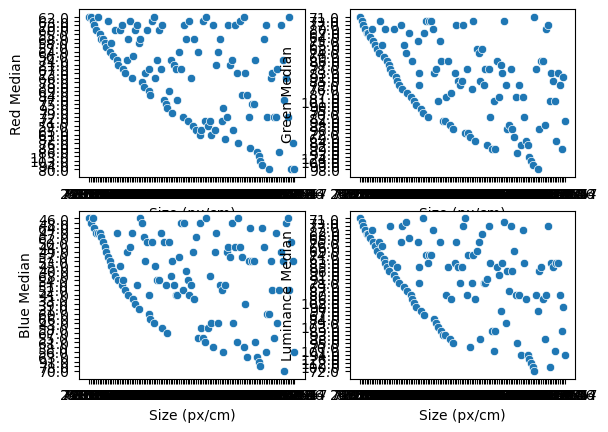

In [106]:
fig, ax = plt.subplots(2,2)
ax[0,0] = sns.scatterplot(data=output_datasheet, x='Size (px/cm)', y='Red Median', ax=ax[0,0])
ax[0,1] = sns.scatterplot(data=output_datasheet, x='Size (px/cm)', y='Green Median', ax=ax[0,1])
ax[1,0] = sns.scatterplot(data=output_datasheet, x='Size (px/cm)', y='Blue Median', ax=ax[1,0])
ax[1,1] = sns.scatterplot(data=output_datasheet, x='Size (px/cm)', y='Luminance Median', ax=ax[1,1])
plt.show()

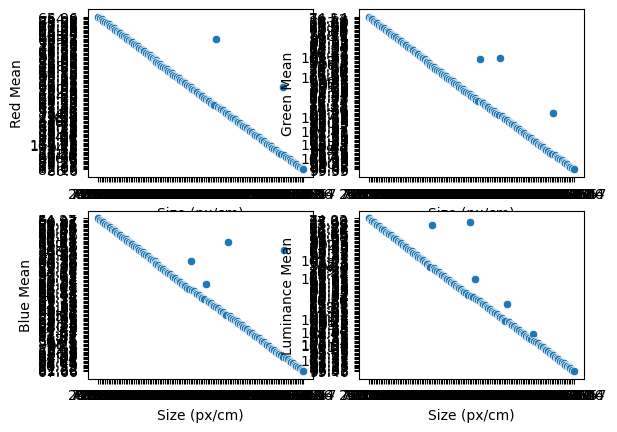

In [25]:
fig, ax = plt.subplots(2,2)
ax[0,0] = sns.scatterplot(data=output_datasheet, x='Size (px/cm)', y='Red Mean', ax=ax[0,0])
ax[0,1] = sns.scatterplot(data=output_datasheet, x='Size (px/cm)', y='Green Mean', ax=ax[0,1])
ax[1,0] = sns.scatterplot(data=output_datasheet, x='Size (px/cm)', y='Blue Mean', ax=ax[1,0])
ax[1,1] = sns.scatterplot(data=output_datasheet, x='Size (px/cm)', y='Luminance Mean', ax=ax[1,1])